<a href="https://colab.research.google.com/github/atc857/lnreg_sklearn/blob/main/Aula6_Linear_Regression(sklearn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear utilizando Python

Disciplina: Metodologia Científica 2 (Métodos Quantitativos)

por André T. Campos

Regressão é um modelo preditivo de machine learning. Em Python, uma das ferramentas mais utilizadas para essa finalidade é o `scikit-learn`, cuja documentação completa pode ser acessada no link https://scikit-learn.org/stable/.

![scikit learn logo](https://upload.wikimedia.org/wikipedia/commons/0/05/Scikit_learn_logo_small.svg)

In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [2]:
# Configuração do estilo dos gráficos
sns.set(style='ticks')

## Dataset

Para aplicar os conceitos de regressão linear, utilizaremos o conjunto de dados Boston House Prices. Os dados foram produzidos pelo Boston Standard Metropolitan Statistical Area (SMSA) em 1970. São 14 colunas, conforme definido a seguir.

1. CRIM - per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to ﬁve Boston employment centers
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per 10,000 doller
11. PTRATIO: pupil-teacher ratio by town
12. B: (1000(Bk−0.63)2) where Bk is the proportion of blacks by
13. LSTAT: % lower status of the population
14. MEDV: Median value of owner-occupied homes in 1000 doller

In [3]:
# importação do dataset
datalink = 'https://raw.githubusercontent.com/scikit-learn/scikit-learn/main/sklearn/datasets/data/boston_house_prices.csv'
df = pd.read_csv(datalink, header=1)

## Análise exploratória de dados

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


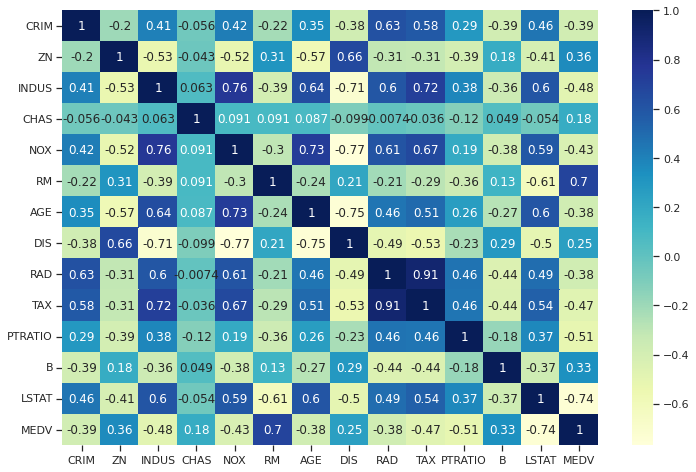

In [7]:
# Mapa de calor para a correlação entre variáveis
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

Pelo mapa de correlação é possível identificar que MEDV (variável alvo) tem correlação forte ou moderada com LSTAT (-0.74); RM (0.7); PTRATIO (-0.51); INDUS (-0.48); TAX (-0.47); e NOX (-0.43). Vamos inspecionar o diagrama de dispersão para essas variáveis.

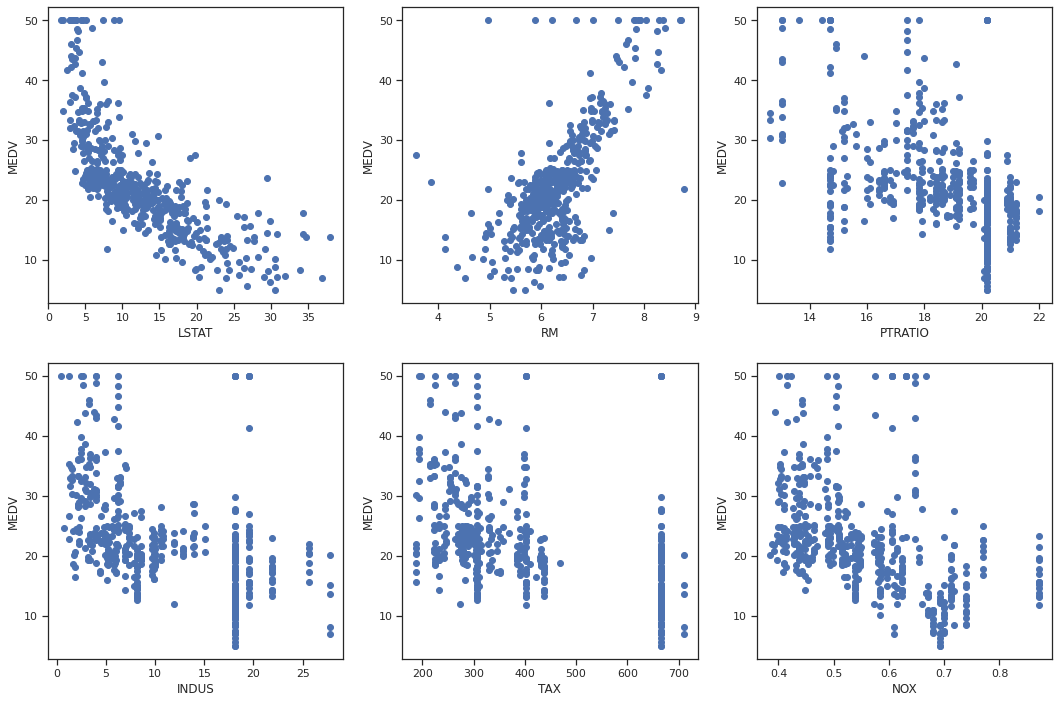

In [8]:
# Diagrama de dispersão 
variaveis = ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX']
fig, ax = plt.subplots(2,3, figsize=(18,12))
ax = ax.flatten()
for i,variavel in enumerate(variaveis):
  ax[i].scatter(df[variavel],df['MEDV'])
  ax[i].set_xlabel(variavel)
  ax[i].set_ylabel('MEDV')

plt.show()

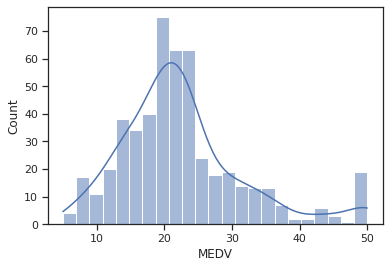

In [9]:
# histograma da variável alvo (dependente)
sns.histplot(x=df['MEDV'], kde=True)

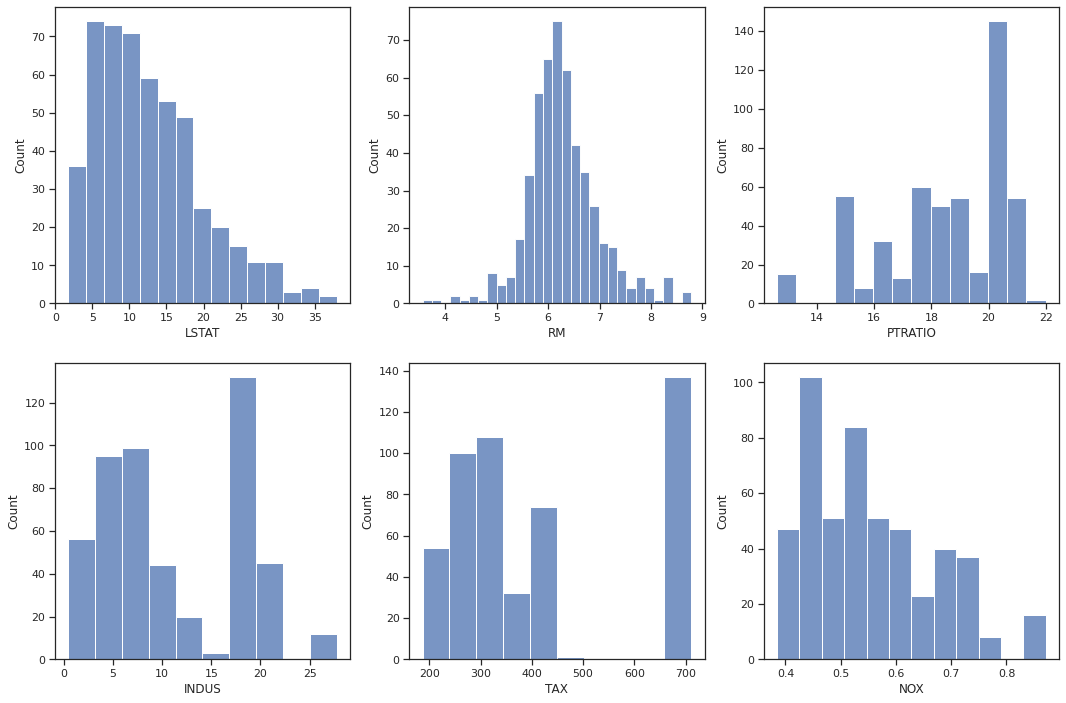

In [10]:
# histogramas das variáveis independentes
variaveis = ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX']
fig, ax = plt.subplots(2,3, figsize=(18,12))
ax = ax.flatten()
for i,variavel in enumerate(variaveis):
  sns.histplot(x=df[variavel], ax=ax[i])
  ax[i].set_xlabel(variavel)
  
plt.show()

# Regressão Linear Simples



---


**Ex. 1)** Desenvolver um modelo de regressão linear simples para estimar o preço mediano do imóvel (MEDV) a partir do número de dormitórios no docmicílio (RM).

In [11]:
# definição de variáveis
Y = df['MEDV']
X = df[['RM']]

In [12]:
# cria o modelo
modelo1 = linear_model.LinearRegression()

In [13]:
# treina o modelo com as variáveis selecionadas
modelo1.fit(X, Y)

LinearRegression()

In [14]:
# Exibe os coeficientes do modelo na tela
a = modelo1.intercept_
b = modelo1.coef_[0]
print(f'A reta de regressão ficou assim: y = {a:.4f} + ({b:.4f})*x')


A reta de regressão ficou assim: y = -34.6706 + (9.1021)*x


## Qualidade do modelo

In [15]:
# Coeficiente de determinação do modelo
# varia de 0 a 1 e indica o poder de explicação do modelo
r_sq = modelo1.score(X,Y)
print(f"Coeficiente de determinação r2 = {r_sq:.4f}")

Coeficiente de determinação r2 = 0.4835


O coeficiente de determinação $ r^2 $ é a métrica mais importante para avaliar a regressão. Tanto que ela já pode ser calculada por meio do comando `.score()`, fornecendo os valores de X e Y. No entanto, o sklearn possui uma biblioteca dedicada a essa avaliação de qualidade. Então, usaremos ela a seguir.

In [16]:
# Para avaliar a qualidade do modelo usamos a biblioteca metrics do sklearn
from sklearn import metrics

In [17]:
# Valores preditos pelo modelo
# Normalmente, não é assim que se procede. O correto é separar a base de dados em treino (80%) e teste (20%) e deixar o sklearn calcular y_pred (yhat).
yhat = a + b*X

In [18]:
# Coeficiente de determinação do modelo
# varia de 0 a 1 e indica o poder de explicação do modelo
r_sq = metrics.r2_score(Y,yhat)
print(f"Coeficiente de determinação r2 = {r_sq:.4f}")

Coeficiente de determinação r2 = 0.4835


In [19]:
# RMSE - root mean squared error
# O erro padrão ou desvio padrão do erro aleatório é uma importante métrica para comparar modelos
# Quanto menor o valor, melhor o modelo.
rmse = metrics.mean_squared_error(Y,yhat,squared=False)
print(f"Desvio padrão s_e = {rmse:.4f}")

Desvio padrão s_e = 6.6031


# Regressão Linear Múltipla



---


**Ex. 2)** Desenvolver um modelo de regressão linear múltipla para estimar o preço mediano do imóvel (MEDV).

In [20]:
# definição de variáveis
Y = df['MEDV']
X = df[['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX']]
# desta vez, vamos deixar o sklearn separar as variáveis em dois grupos treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [21]:
X

,LSTAT,RM,PTRATIO,INDUS,TAX,NOX
0,4.98,6.575,15.3,2.31,296,0.538
1,9.14,6.421,17.8,7.07,242,0.469
2,4.03,7.185,17.8,7.07,242,0.469
3,2.94,6.998,18.7,2.18,222,0.458
4,5.33,7.147,18.7,2.18,222,0.458
...,...,...,...,...,...,...
501,9.67,6.593,21.0,11.93,273,0.573
502,9.08,6.120,21.0,11.93,273,0.573
503,5.64,6.976,21.0,11.93,273,0.573
504,6.48,6.794,21.0,11.93,273,0.573


In [22]:
# cria o modelo e o treina com as variáveis separadas para treino
modelo2 = linear_model.LinearRegression()
modelo2.fit(X_train, y_train)

LinearRegression()

In [23]:
# Exibe os coeficientes do modelo na tela
a = modelo2.intercept_
b = modelo2.coef_
print(f"O intercepto é: {a:.4f}")
print(f"Os coeficientes angulares do modelo são: {b}")

O intercepto é: 14.3760
Os coeficientes angulares do modelo são: [-5.45490256e-01  5.13856478e+00 -8.24986064e-01  1.21918051e-01
 -4.55420837e-03 -2.92114206e+00]


## Qualidade do modelo

In [24]:
# Para avaliar a qualidade do modelo usamos a biblioteca metrics do sklearn
# Valores preditos pelo modelo
yhat = modelo2.predict(X_test)

In [25]:
# Coeficiente de determinação do modelo
# varia de 0 a 1 e indica o poder de explicação do modelo
r_sq = metrics.r2_score(y_test,yhat)
print(f"Coeficiente de determinação r2 = {r_sq:.4f}")

Coeficiente de determinação r2 = 0.6210


In [26]:
# RMSE - root mean squared error
# O erro padrão ou desvio padrão do erro aleatório é uma importante métrica para comparar modelos
# Quanto menor o valor, melhor o modelo.
rmse = metrics.mean_squared_error(y_test,yhat,squared=False)
print(f"Desvio padrão s_e = {rmse:.4f}")

Desvio padrão s_e = 5.2723


# Modelo de Regressão otimizado



---


**Ex. 3)** Otimizar o modelo de regressão linear múltipla para estimar o preço mediano do imóvel (MEDV).

Vamos tentar melhorar o modelo aplicando transformação logarítimica nas variáveis com assimetria.

In [27]:
# transformação de variáveis
Y =  np.log(Y) # log da variável alvo
# log das variáveis independentes com assimetria maior que 0.3
for col in X.columns:
    if np.abs(X[col].skew()) > 0.3:
        X[col] = np.log(X[col])

<ipython-input-27-5c02b69f4486>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = np.log(X[col])


In [28]:
X

,LSTAT,RM,PTRATIO,INDUS,TAX,NOX
0,1.605430,1.883275,2.727853,2.31,5.690359,-0.619897
1,2.212660,1.859574,2.879198,7.07,5.488938,-0.757153
2,1.393766,1.971996,2.879198,7.07,5.488938,-0.757153
3,1.078410,1.945624,2.928524,2.18,5.402677,-0.780886
4,1.673351,1.966693,2.928524,2.18,5.402677,-0.780886
...,...,...,...,...,...,...
501,2.269028,1.886008,3.044522,11.93,5.609472,-0.556870
502,2.206074,1.811562,3.044522,11.93,5.609472,-0.556870
503,1.729884,1.942476,3.044522,11.93,5.609472,-0.556870
504,1.868721,1.916040,3.044522,11.93,5.609472,-0.556870


In [29]:
# split do dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [30]:
# cria o modelo e o treina com as variáveis separadas para treino
modelo3 = linear_model.LinearRegression()
modelo3.fit(X_train, y_train)

LinearRegression()

In [31]:
# Exibe os coeficientes do modelo na tela
a = modelo3.intercept_
b = modelo3.coef_
print(f"O intercepto é: {a:.4f}")
print(f"Os coeficientes angulares do modelo são: {b}")

O intercepto é: 5.6484
Os coeficientes angulares do modelo são: [-0.42307646  0.50702657 -0.48001063  0.004016   -0.20071908  0.00362486]


In [32]:
# Exibe os coeficientes em formato mais amigável
bdf = pd.DataFrame(modelo3.coef_,X.columns,columns=['Coefficient'])
bdf

,Coefficient
LSTAT,-0.423076
RM,0.507027
PTRATIO,-0.480011
INDUS,0.004016
TAX,-0.200719
NOX,0.003625


## Qualidade do modelo

In [33]:
# Para avaliar a qualidade do modelo usamos a biblioteca metrics do sklearn
# Valores preditos pelo modelo
yhat = modelo3.predict(X_test)

In [34]:
# Coeficiente de determinação do modelo
# varia de 0 a 1 e indica o poder de explicação do modelo
r_sq = metrics.r2_score(y_test,yhat)
print(f"Coeficiente de determinação r2 = {r_sq:.4f}")

Coeficiente de determinação r2 = 0.7008


In [35]:
# RMSE - root mean squared error
# O erro padrão ou desvio padrão do erro aleatório é uma importante métrica para comparar modelos
# Quanto menor o valor, melhor o modelo.
rmse = metrics.mean_squared_error(y_test,yhat,squared=False)
print(f"Desvio padrão s_e = {rmse:.4f}")

Desvio padrão s_e = 0.2160
